<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ufidon/ml/blob/main/mod3/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ufidon/ml/blob/main/mod3/svm.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>
<br>




[Support vector machine (SVM)](https://en.wikipedia.org/wiki/Support_vector_machine)
---
_homl3 ch5_

- a supervised max-margin model
- supports linear and nonlinear classification, regression and outlier detection
  - nonlinearity is achieved by kernel functions
- suitable from small to medium-sized nonlinear datasets
  - not well-scalable to very large datasets

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sklearn as skl, sklearn.datasets as skds
from sklearn.svm import SVC

Linear SVM classification of - [the iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)
---
- consists of 3 different types of irises 
  - Setosa, Versicolour, and Virginica
  - 150 samples with 4 features
    - Sepal Length, Sepal Width, Petal Length and Petal Width

In [2]:
iris = skds.load_iris(as_frame=True)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris.data.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [4]:
iris.data.min(axis=0), iris.data.max(axis=0)

(sepal length (cm)    4.3
 sepal width (cm)     2.0
 petal length (cm)    1.0
 petal width (cm)     0.1
 dtype: float64,
 sepal length (cm)    7.9
 sepal width (cm)     4.4
 petal length (cm)    6.9
 petal width (cm)     2.5
 dtype: float64)

In [5]:
np.unique(iris.target.values), iris.target_names

(array([0, 1, 2]), array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [6]:

X = iris.data[['sepal length (cm)', 'sepal width (cm)']].values
y = iris.target
setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM classifier model with Linear kernel
lsvm_clf = SVC(kernel='linear', C=1e100)
lsvm_clf.fit(X,y)

SVC(C=1e+100, kernel='linear')

In [7]:
lsvm_clf.support_vectors_

array([[5.5, 3.5],
       [4.5, 2.3],
       [4.9, 2.4],
       [5.4, 3. ]])

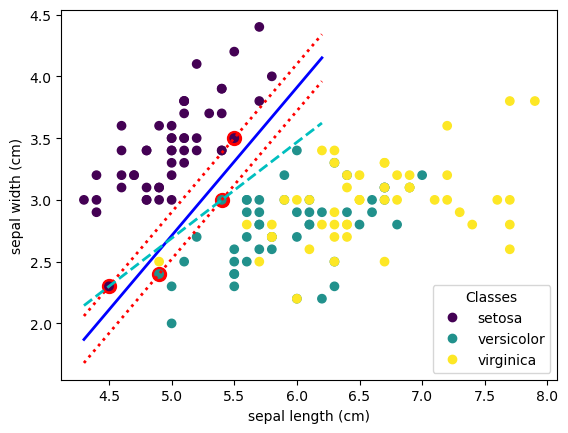

In [8]:
# the plot below uses the first two features
_,ax1 = plt.subplots()
# iris.data.plot(ax=ax1, kind='scatter', x='sepal length (cm)', y='sepal width (cm)', c=iris.target)
iris_scatter = ax1.scatter(iris.data['sepal length (cm)'], iris.data['sepal width (cm)'], c=iris.target)

def plot_svc_street(ax, svm_clf, xmin, xmax):
  # decision line: w0*x0+w1*x1+b=0 => x1=-w0/w1*x0-b/w1
  w, b = svm_clf.coef_[0], svm_clf.intercept_[0]
  x = np.linspace(xmin, xmax, 200)
  decision_line = -w[0]/w[1]*x-b/w[1]
  margin = 1/w[1]
  street_up, street_down = decision_line + margin, decision_line-margin
  svs = svm_clf.support_vectors_
  ax.plot(x, decision_line, 'b-', linewidth=2)
  ax.plot(x, street_up, 'r:', linewidth=2)
  ax.plot(x, street_down, 'r:', linewidth=2)
  ax.scatter(svs[:,0], svs[:,1], s=100, facecolor='#ff0000',zorder=-1)

plot_svc_street(ax1, lsvm_clf, 4.3, 6.2)

x0 = np.linspace(4.3, 6.2, 200)
bad0 = 7/9*(x0-4.5)+2.3
ax1.plot(x0, bad0, 'c--', linewidth=2)

ax1.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax1.legend(iris_scatter.legend_elements()[0],
               iris.target_names,
               loc='lower right',
               title='Classes')

- with the first two features,
  - setosa is linearly separable from versicolor
  - however, versicolor and virginica are not separable
- both the SVM decision boundary (the blue sold line) and the cyan dash line (the decision boundary of another poor classifier) separate the setosa and versicolor
  - there is a possibly widest margin for the SVM blue line
    - marked with the two dotted red lines
      - fully determined by the samples located on the edge of the street
      - these samples are called *support vectors*
    - so SVM classification is also called *large margin classification*
    - instances off the street will not affect the decision boundary
  - but no margin for the cyan line
    - may not perform well on new instances

SVMs are sensitive to the feature scales
---
- the widest possible street is closer to the feature with smaller scale

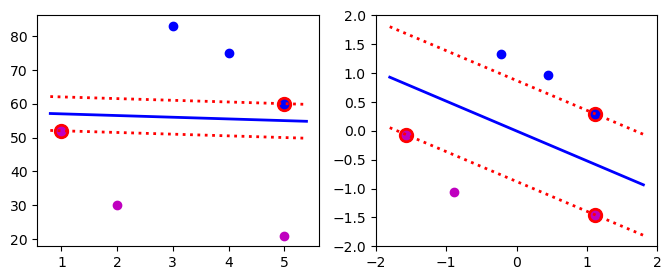

In [9]:
from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 52], [2,30], [5, 21], [3, 83], [4,75], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 0, 1, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel='linear', C=100).fit(X_scaled, ys)

fig, axes = plt.subplots(1, 2, figsize=(8,3))
axes[0].plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
axes[0].plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "mo")
plot_svc_street(axes[0], svm_clf, 0.8, 5.4)

axes[1].plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
axes[1].plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "mo")
axes[1].axis([-2,2,-2,2])
plot_svc_street(axes[1], svm_clf_scaled, -1.8, 1.8)

Hard margin vs. soft margin
---
- hard margin
  - all samples must be off the street and on the correct side
  - two issues
    - only applicable to linearly separable datasets
    - sensitive to outliers so may not generalize
- soft margin
  - solved the hard margin issues
  - find a trade-off between 
    - maximizing the street width, and
    - minimizing the margin violations, those samples on the street even the wrong side
  - achieved by the regularization hyperparameter $C$
    - the smaller $C$, the wider street but more violations
      - risk of underfitting
    - the larger $C$, the less violations but narrower street
      - risk of overfitting

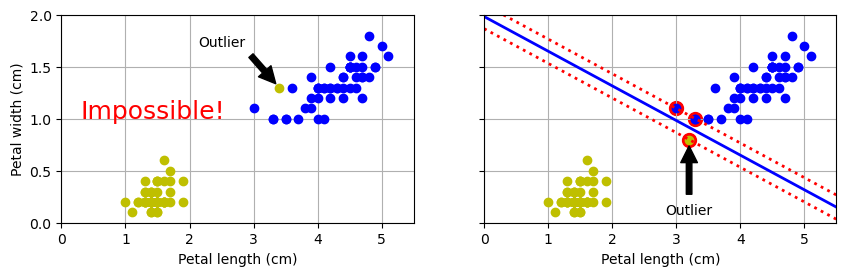

In [10]:
# Hard margin sensitivity to outliers
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig2, axes2 = plt.subplots(1,2, figsize=(10, 2.7), sharey=True)
axes2[0].plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bo")
axes2[0].plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
axes2[0].text(0.3, 1.0, "Impossible!", color="red", fontsize=18)
axes2[0].set(xlabel="Petal length (cm)", ylabel="Petal width (cm)")
axes2[0].annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
axes2[0].axis([0, 5.5, 0, 2])
axes2[0].grid()

axes2[1].plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bo")
axes2[1].plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_street(axes2[1], svm_clf2, 0, 5.5)
axes2[1].set_xlabel("Petal length (cm)")
axes2[1].annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
axes2[1].axis([0, 5.5, 0, 2])
axes2[1].grid()

In [11]:
# Make a trade-off by hyperparameter C
# below, the model with C=100 looks like it will generalize better
# than the one with C=1

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = skds.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Iris virginica

svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, dual=True, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=True, random_state=42))])

In [12]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new), svm_clf.decision_function(X_new)

(array([ True, False]), array([ 0.66163411, -0.22036063]))

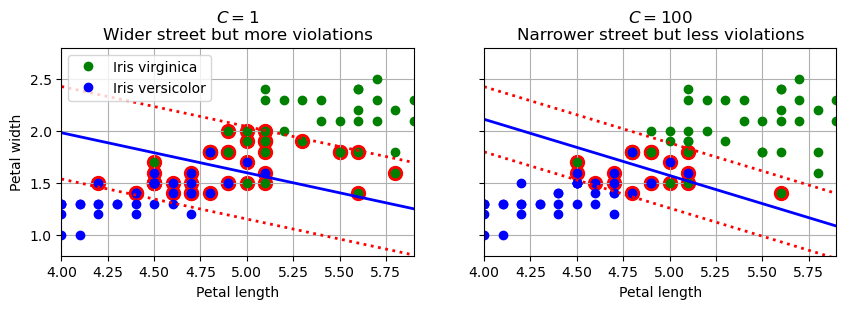

In [13]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig3, axes3 = plt.subplots(1, 2, figsize=(10, 2.7), sharey=True)

axes3[0].plot(X[:, 0][y==1], X[:, 1][y==1], "go", label="Iris virginica")
axes3[0].plot(X[:, 0][y==0], X[:, 1][y==0], "bo", label="Iris versicolor")
plot_svc_street(axes3[0], svm_clf1, 4, 5.9)
axes3[0].set(xlabel="Petal length", ylabel="Petal width", title=f"$C = {svm_clf1.C}$\nWider street but more violations")
axes3[0].legend(loc="upper left")
axes3[0].axis([4, 5.9, 0.8, 2.8])
axes3[0].grid()

axes3[1].plot(X[:, 0][y==1], X[:, 1][y==1], "go")
axes3[1].plot(X[:, 0][y==0], X[:, 1][y==0], "bo")
plot_svc_street(axes3[1], svm_clf2, 4, 5.99)
axes3[1].set(xlabel="Petal length", title=f"$C = {svm_clf2.C}$\nNarrower street but less violations")
axes3[1].axis([4, 5.9, 0.8, 2.8])
axes3[1].grid()


Detect iris virginica flowers
---
- load the iris dataset 
- train a linear SVM classifier in a pipeline
  - first scale the features with the StandardScaler
  - next use a LinearSVC with C=1

In [14]:
# train the model in a pipeline
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # Iris virginica
svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=42, dual='auto'))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual='auto', random_state=42))])

In [15]:
# make predictions
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new),  svm_clf.decision_function(X_new)

(array([ True, False]), array([ 0.66163816, -0.22035761]))

Nonlinear SVM Classification
---
- SVM natively works on linearly separable datasets
- we may make nonlinear datasets linearly separable by adding more features such as  
  - polynomial features 
    - polynomial function of the original feature
  - similarity features
    - measures how much each sample resembles a particular landmark
  - both features are usable to any ML models, not only SVMs

(-4.5, 4.5, -1.0, 17.0)

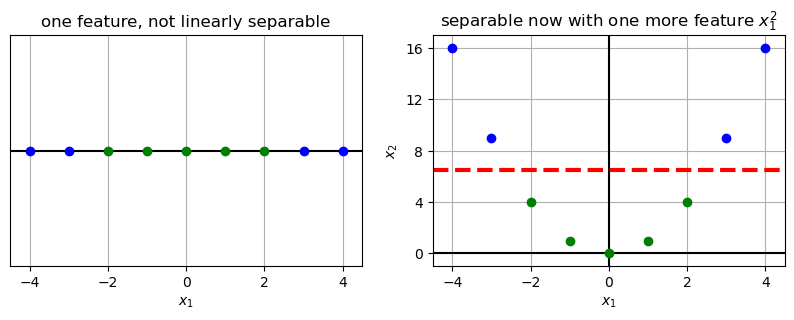

In [16]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

fig4, axes4 = plt.subplots(1, 2, figsize=(10, 3))


axes4[0].grid(True)
axes4[0].axhline(y=0, color='k')
axes4[0].plot(X1D[:, 0][y==0], np.zeros(4), "bo")
axes4[0].plot(X1D[:, 0][y==1], np.zeros(5), "go")
axes4[0].set_yticks([])
axes4[0].set(xlabel="$x_1$", title="one feature, not linearly separable")
axes4[0].axis([-4.5, 4.5, -0.2, 0.2])

axes4[1].grid(True)
axes4[1].axhline(y=0, color='k')
axes4[1].axvline(x=0, color='k')
axes4[1].plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bo")
axes4[1].plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "go")
axes4[1].set(xlabel="$x_1$", ylabel="$x_2$", title="separable now with one more feature $x_1^2$")
axes4[1].set_yticks([0, 4, 8, 12, 16])
axes4[1].plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
axes4[1].axis([-4.5, 4.5, -1, 17])


A pipeline applying polynomial features
---
- create a pipeline containing a PolynomialFeatures transformer
- then a StandardScaler and a LinearSVC classifier
- issues
  - a low polynomial degree cannot deal with very complex datasets
  - a high polynomial degree creates a huge number of features, 
    - making the model too slow

In [17]:
# apply polynomial features on the moon data set - two interleaving crescent moons
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.18, random_state=50)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, dual=True, max_iter=10000, random_state=42))])

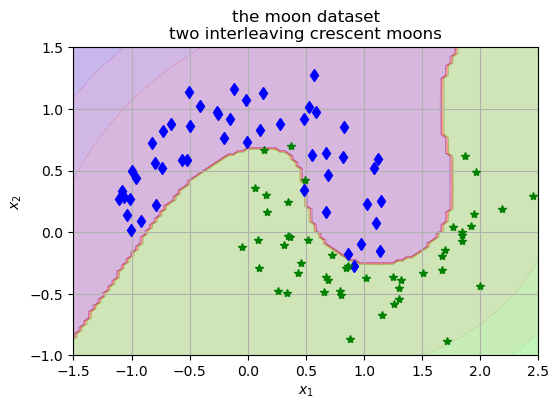

In [18]:
def plot_dataset(ax, X, y, axis):
    ax.plot(X[:, 0][y==0], X[:, 1][y==0], "bd")
    ax.plot(X[:, 0][y==1], X[:, 1][y==1], "g*")
    ax.axis(axis)
    ax.grid(True)
    ax.set(xlabel="$x_1$", ylabel="$x_2$", title='the moon dataset\ntwo interleaving crescent moons')

def plot_predictions(ax, clf, axis):
    x0s = np.linspace(axis[0], axis[1], 100)
    x1s = np.linspace(axis[2], axis[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    ax.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    ax.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

fig5, axes5 = plt.subplots(figsize=(6, 4))
plot_predictions(axes5, polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(axes5, X, y, [-1.5, 2.5, -1, 1.5])

Polynomial Kernel
---
- achieve the same result as if added many polynomial feature
- even with a very high degree, without actually having to add them
  - so, no combinatorial explosion of the number of features
- implemented by the SVM class

In [19]:
# classify the moon dataset with SVM with polynomial kernel
# hyperparameter coef0 controls how much the model is influenced 
# by high degree terms versus low-degree terms
poly_kernel_svm_clf = make_pipeline(StandardScaler(), 
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [20]:
poly6_kernel_svm_clf = make_pipeline(StandardScaler(),
                                       SVC(kernel="poly", degree=6, coef0=100, C=5)
)
poly6_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=100, degree=6, kernel='poly'))])

[Text(0.5, 1.0, 'degree=6, coef0=100, C=5'), Text(0, 0.5, '')]

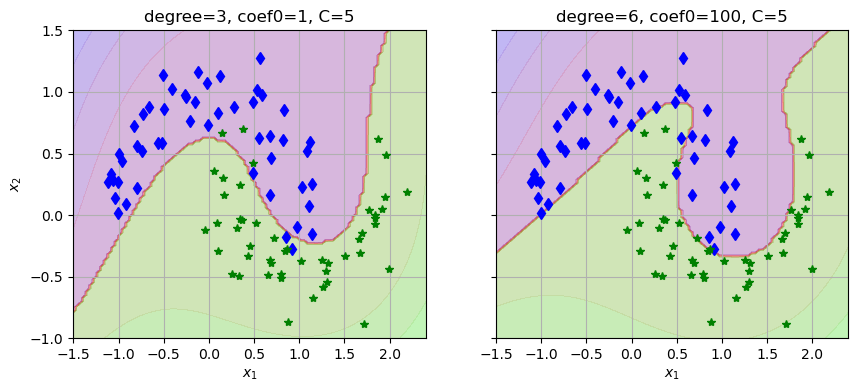

In [21]:
fig6, axes6 = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

plot_predictions(axes6[0], poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(axes6[0], X, y, [-1.5, 2.4, -1, 1.5])
axes6[0].set(title="degree=3, coef0=1, C=5")

plot_predictions(axes6[1], poly6_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(axes6[1], X, y, [-1.5, 2.4, -1, 1.5])
axes6[1].set(title="degree=6, coef0=100, C=5", ylabel="")

How to select landmarks for Similarity Features
---
- create a landmark at the location of each instance in the dataset
  - many dimensions are created to increase the chances that 
    - the transformed training set will be linearly separable
  - issue: too many features incur the *curse of dimensionality*
- a similarity function: [Gaussian RBF (Radial basis function)](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)
  - ${\displaystyle K(\mathbf {x} ,\mathbf {x'} )=\exp(-\gamma \|\mathbf {x} -\mathbf {x'} \|^{2})}$, in which ${\displaystyle \textstyle \gamma ={\tfrac {1}{2\sigma ^{2}}}}$

(-0.1, 1.1, -0.1, 1.1)

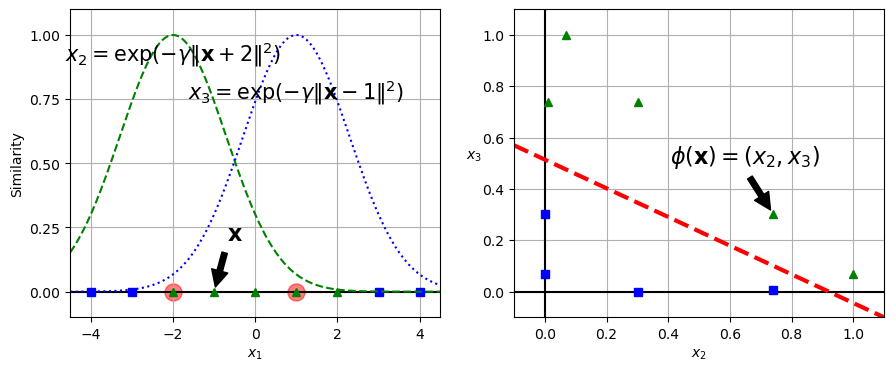

In [22]:
# a similarity function -  Gaussian RBF 
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

fig7, axes7 = plt.subplots(1, 2, figsize=(10.5, 4))


axes7[0].grid(True)
axes7[0].axhline(y=0, color='k')
axes7[0].scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
axes7[0].plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
axes7[0].plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
axes7[0].plot(x1s, x2s, "g--")
axes7[0].plot(x1s, x3s, "b:")
axes7[0].set(xlabel="$x_1$", ylabel="Similarity", yticks=[0, 0.25, 0.5, 0.75, 1])
axes7[0].annotate(
    r'$\mathbf{x}$',
    xy=(X1D[3, 0], 0),
    xytext=(-0.5, 0.20),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
axes7[0].text(-2, 0.9, "$x_2=\exp(-\gamma \|\mathbf {x} +2 \|^{2})$", ha="center", fontsize=15)
axes7[0].text(1, 0.75, "$x_3=\exp(-\gamma \|\mathbf {x} -1 \|^{2})$", ha="center", fontsize=15)
axes7[0].axis([-4.5, 4.5, -0.1, 1.1])

axes7[1].grid(True)
axes7[1].axhline(y=0, color='k')
axes7[1].axvline(x=0, color='k')
axes7[1].plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
axes7[1].plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
axes7[1].set(xlabel="$x_2$")
axes7[1].set_ylabel("$x_3$  ", rotation=0)
axes7[1].annotate(
    r'$\phi\left(\mathbf{x}\right)=\left(x_2,x_3\right)$',
    xy=(XK[3, 0], XK[3, 1]),
    xytext=(0.65, 0.50),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
axes7[1].plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
axes7[1].axis([-0.1, 1.1, -0.1, 1.1])

Gaussian RBF Kernel
---
- obtains a similar result as if added many similarity features
  - but without actually doing so
- γ acts like a regularization hyperparameter
  - A larger γ makes the bell-shaped curve narrower, which causes
    - each instance has smaller range of influence,
      - the decision boundary ends up being more irregular
  - A small γ makes the bell-shaped curve wider, which causes 
    - each instance has a larger range of influence, 
      - the decision boundary ends up smoother
  - reduce γ if overfitting, increase γ if underfitting
- there are other kernels such as
  - String kernels for classifying text documents or DNA sequences
- The order to choose kernels
  - LinearSVC → SVC(kernel="linear") → SVM with with the Gaussian RBF → SVM with other kernels

In [23]:
# apply Gaussian RBF Kernel
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

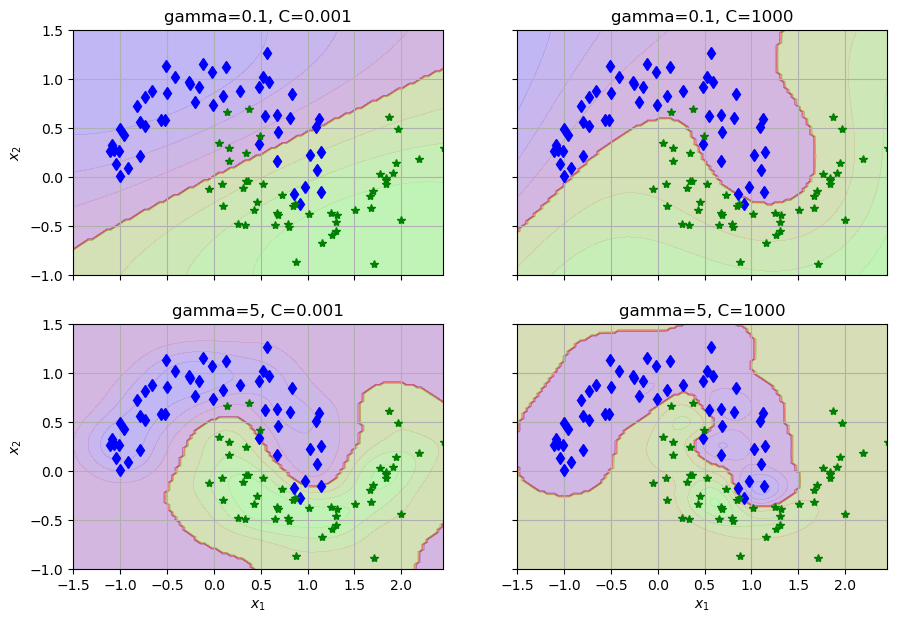

In [24]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig8, axes8 = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plot_predictions(axes8[i // 2, i % 2], svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(axes8[i // 2, i % 2], X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    axes8[i // 2, i % 2].set_title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        axes8[i // 2, i % 2].set_xlabel("")
    if i in (1, 3):
        axes8[i // 2, i % 2].set_ylabel("")

[SVM Classes and Computational Complexity](https://scikit-learn.org/stable/modules/svm.html)
---
- for datasets with $n$ samples and $m$ features 

| Class |  Time complexity | Out-of-core support | Scaling required | Kernel trick |
|:---:|:---:|:---:|:---:|:---:|
| LinearSVC |  $O(n × m)$ |  No |  Yes |  No |
| SVC | $O(n^2 × m)$ to $O(n^3 × m)$| No | Yes | Yes |
| SGDClassifier | $O(n × m)$ |  Yes | Yes | No |

SVM regression
---
- the objective is contrary to classification
  - fits as many instances as possible on the street while limiting margin violations, i.e. instances off the street
- the street width is controlled by a hyperparameter ε
  - smaller ε narrows the street with more support vectors
  - the model's predictions are not affected by more training instances on the street
    - this is called *ε-insensitive*
- nonlinear regression tasks can be solved with kernelized SVM models
- the model is regularized by a hyperparameter C
  - the strength of regularization is inversely proportional to C

In [25]:
# visualize SVM ε-regularization
# 1. generate a toy linear dataset
from sklearn.svm import LinearSVR

np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(), LinearSVR(epsilon=0.5, dual=True, random_state=42))
svm_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, epsilon=0.5, random_state=42))])

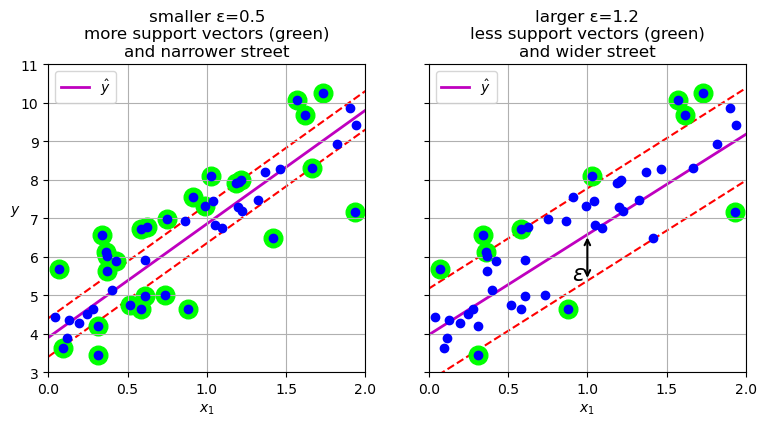

In [26]:
# 2. visualize SVM ε-regularization
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(ax, svm_reg, X, y, axis):
    x1s = np.linspace(axis[0], axis[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    ax.plot(x1s, y_pred, "m-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    ax.plot(x1s, y_pred + epsilon, "r--", zorder=-2)
    ax.plot(x1s, y_pred - epsilon, "r--", zorder=-2)
    ax.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#00ff00', zorder=-1)
    ax.plot(X, y, "bo")
    ax.set_xlabel("$x_1$")
    ax.legend(loc="upper left")
    ax.axis(axis)

svm_reg2 = make_pipeline(StandardScaler(), LinearSVR(epsilon=1.2, dual=True, random_state=42))
svm_reg2.fit(X, y)

svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

fig9, axes9 = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

plot_svm_regression(axes9[0], svm_reg, X, y, [0, 2, 3, 11])
axes9[0].set_title(f"smaller ε={svm_reg[-1].epsilon}\nmore support vectors (green)\nand narrower street")
axes9[0].set_ylabel("$y$", rotation=0)
axes9[0].grid()

plot_svm_regression(axes9[1], svm_reg2, X, y, [0, 2, 3, 11])
axes9[1].set_title(f"larger ε={svm_reg2[-1].epsilon}\nless support vectors (green)\nand wider street")
axes9[1].annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
axes9[1].text(0.90, 5.4, r"$\epsilon$", fontsize=16)
axes9[1].grid()

In [27]:
# tackle nonlinear regression tasks using a kernelized SVM model
# 1. generate a toy quadratic dataset
from sklearn.svm import SVR

np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(), SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

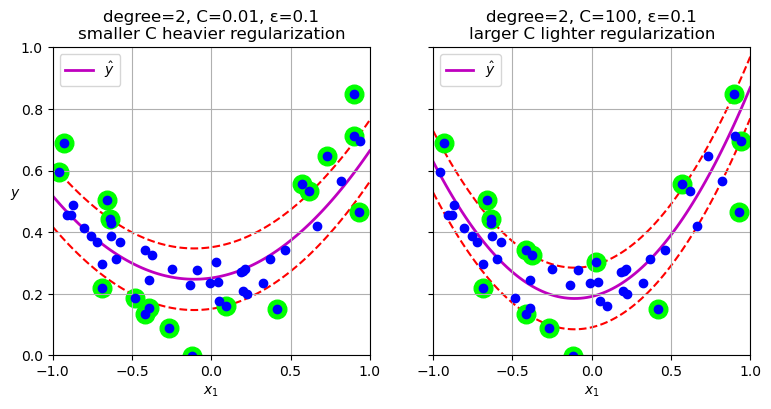

In [28]:
# 2. visualize SVM regression using a second-degree polynomial kernel
svm_poly_reg2 = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=100))
svm_poly_reg2.fit(X, y)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

figa, axesa = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plot_svm_regression(axesa[0], svm_poly_reg, X, y, [-1, 1, 0, 1])
axesa[0].set_title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"ε={svm_poly_reg[-1].epsilon}"
          "\nsmaller C heavier regularization")
axesa[0].set_ylabel("$y$", rotation=0)
axesa[0].grid()

plot_svm_regression(axesa[1], svm_poly_reg2, X, y, [-1, 1, 0, 1])
axesa[1].set_title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"ε={svm_poly_reg2[-1].epsilon}"
          "\nlarger C lighter regularization")
axesa[1].grid()

The math behind SVM
---
- A SVM constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space
  - can be used for classification, regression or other tasks
- A good hyper-plane has the largest distance to the nearest training data points of any class (so-called functional margin)
  - the larger the margin the lower the generalization error of the classifier

🍎 Example
---
For linear SVM classification of two classes, the predicted class $\hat{y}$ of a given sample $\mathbf{x}$ is decided by the decision function $\displaystyle \boldsymbol{\theta}^T\mathbf{x}=\sum_{i=0}^{n}\theta_ix_i$:
- if $\boldsymbol{\theta}^T\mathbf{x}>0$ then $\hat{y}=1$, the positive class
- else $\hat{y}=-1$, the negative class

Training a linear SVM classifier seeks a weights vector $\boldsymbol{w}=\lbrace \theta_1, \theta_2, \cdots, \theta_n \rbrace$ that makes the street as wide as possible while limiting the number of margin violations.
- the smaller weight vector, the larger margin
- the bias term $\theta_0$ just shifts the margin around without affecting its size

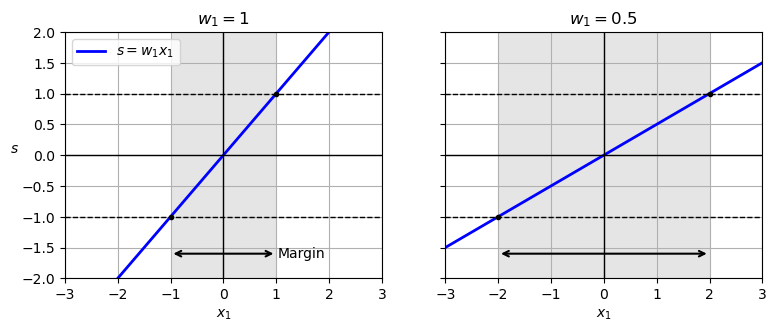

In [29]:
import matplotlib.patches as patches

def plot_2D_decision_function(ax, w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    half_margin = 1 / w

    ax.plot(x1, y, "b-", linewidth=2, label=r"$s = w_1 x_1$")
    ax.axhline(y=0, color='k', linewidth=1)
    ax.axvline(x=0, color='k', linewidth=1)
    rect = patches.Rectangle((-half_margin, -2), 2 * half_margin, 4,
                             edgecolor='none', facecolor='gray', alpha=0.2)
    ax.add_patch(rect)
    ax.plot([-3, 3], [1, 1], "k--", linewidth=1)
    ax.plot([-3, 3], [-1, -1], "k--", linewidth=1)
    ax.plot(half_margin, 1, "k.")
    ax.plot(-half_margin, -1, "k.")
    ax.axis(x1_lim + [-2, 2])
    ax.set_xlabel("$x_1$")
    if ylabel:
        ax.set_ylabel("$s$", rotation=0, labelpad=5)
        ax.legend()
        ax.text(1.02, -1.6, "Margin", ha="left", va="center", color="k")

    ax.annotate(
        '', xy=(-half_margin, -1.6), xytext=(half_margin, -1.6),
        arrowprops={'ec': 'k', 'arrowstyle': '<->', 'linewidth': 1.5}
    )
    ax.set_title(f"$w_1 = {w}$")
    ax.grid()

figb, axesb = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plot_2D_decision_function(axesb[0], 1, 0)
plot_2D_decision_function(axesb[1], 0.5, 0, ylabel=False)


SVC - support vector classification
---
- Given training vectors $x_i \in \mathbb{R}^p$, i=1,…, n, in two classes, and a vector $y \in \{1, -1\}^n$, 
  - find $w \in\mathbb{R}^p$ and $b \in \mathbb{R}$ such that the prediction given by $\text{sign} (w^T\phi(x) + b)$ is correct for most samples
- SVC solves the following primal problem:

$$\begin{align}\begin{aligned}\min_ {w, b, \zeta} \frac{1}{2} w^T w + C \sum_{i=1}^{n} \zeta_i\\\begin{split}\textrm {subject to } & y_i (w^T \phi (x_i) + b) \geq 1 - \zeta_i,\\
& \zeta_i \geq 0, i=1, ..., n\end{split}\end{aligned}\end{align}$$

- this is a convex quadratic optimization problem with linear constraints
  - known as quadratic programming (QP) problem
  - can be solved with many off-the-shelf solvers

- we’re trying to maximize the margin by minimizing $||w||^2 = w^Tw$
  - a penalty is applied when a sample is misclassified or within the margin boundary
- perfection predictions has $y_i(w^T \phi (x_i) + b)≥1$ for all samples
- real situations allow  some samples to be at a distance $\zeta_i$ from their correct margin boundary
  - The penalty term C controls the strength of this penalty
    - acts as an inverse regularization parameter
- The dual problem to the primal is

$$\begin{align}\begin{aligned}\min_{\alpha} \frac{1}{2} \alpha^T Q \alpha - e^T \alpha\\\begin{split}
\textrm {subject to } & y^T \alpha = 0\\
& 0 \leq \alpha_i \leq C, i=1, ..., n\end{split}\end{aligned}\end{align}$$

- This dual representation highlights the fact that training vectors are implicitly mapped into a higher (maybe infinite) dimensional space by [the function $\phi$](https://en.wikipedia.org/wiki/Kernel_method)
- the output of *decision_function f*or a given sample $x$ becomes:
  - $α_i$ are non-zero only on the support vectors
$$\sum_{i\in SV} y_i \alpha_i K(x_i, x) + b,$$
- the predicted class correspond to its sign
- These parameters can be accessed through respective attributes
  - `dual_coef_` holds $y_i \alpha_i$
  - `support_vectors_` holds the support vectors
  - `intercept_` holds the independent term $b$

Another way to train a SVM is to minimize the hinge loss or the squared hinge loss. By default,
- LinearSVC uses the squared hinge loss
- SGDClassifier uses the hinge loss

both can be changed with the loss hyperparameter


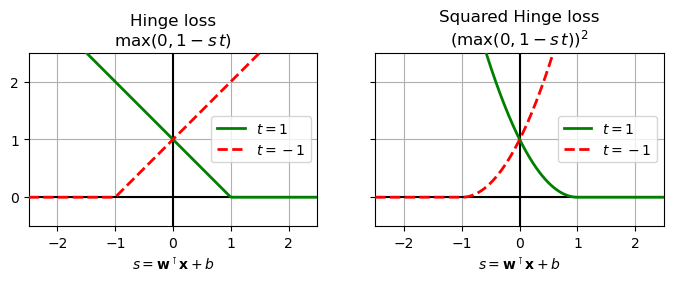

In [38]:
s = np.linspace(-2.5, 2.5, 200)
hinge_pos = np.where(1 - s < 0, 0, 1 - s)  # max(0, 1 - s)
hinge_neg = np.where(1 + s < 0, 0, 1 + s)  # max(0, 1 + s)

titles = ("Hinge loss\n$\max(0, 1 - s\,t)$", "Squared Hinge loss\n$(\max(0, 1 - s\,t))^2$")

fixc, axs = plt.subplots(1, 2, sharey=True, figsize=(8.2, 3))

for ax, loss_pos, loss_neg, title in zip(
        axs, (hinge_pos, hinge_pos ** 2), (hinge_neg, hinge_neg ** 2), titles):
    ax.plot(s, loss_pos, "g-", linewidth=2, zorder=10, label="$t=1$")
    ax.plot(s, loss_neg, "r--", linewidth=2, zorder=10, label="$t=-1$")
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_xlabel(r"$s = \mathbf{w}^\intercal \mathbf{x} + b$")
    ax.axis([-2.5, 2.5, -0.5, 2.5])
    ax.legend(loc="center right")
    ax.set_title(title)
    ax.set_yticks(np.arange(0, 2.5, 1))
    ax.set_aspect("equal")

# References
- [Support Vector Machines in scikit](https://scikit-learn.org/stable/modules/svm.html)